# Data analysis of stellar structure properties 

Using a simple theoretical stellar structure model based on the basic equations of star structures, I will develope a data driven analysis of the results using different tools.

In first place I recolected from Wikipedia data from stars in the Main-sequence, as our theoretical model is based in ZAMS's stars. The data in question are the mass, luminosity, effective temperature and metallicity of each star. The data was collected in the "Stars.csv" file. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

## Data Collected

In [2]:
df = pd.read_csv(r'C:\Users\luisg\Documents\Escuela\9no_semestre\EEE\caroll_model\PIA\Stars.csv')
df

,Luminosity,Mass,Metallicity,T_eff
0,141.510,0.00,0.00,0.0
1,56.000,2.54,9863.00,0.0
2,66.300,2.15,8374.00,0.0
3,52.000,2.36,-0.02,9305.0
4,130.500,2.70,8950.00,0.0
...,...,...,...,...
1380,0.892,5400.00,0.00,0.0
1381,1.107,0.12,5600.00,0.0
1382,0.886,-0.25,5600.00,0.0
1383,0.940,-0.09,6039.00,0.0


### Identifying missing data
Missing data was writen as zeros in the data web scraping section, now it's time to look for that missing data

In [3]:
#identify missing data
df.replace(0.0,np.nan,inplace=True)

#counting missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")


Luminosity
Luminosity
False    1385
Name: count, dtype: int64

Mass
Mass
False    1340
True       45
Name: count, dtype: int64

Metallicity
Metallicity
False    1162
True      223
Name: count, dtype: int64

T_eff
T_eff
True     723
False    662
Name: count, dtype: int64



- Luminosity doesn't have missing values
- Mass has 45 missing values
- Metallicity has 223 missing values
- T_eff has 723 missing value

As more than half of the rows in the effective temperature column are missing values, I will eliminate the missing rows.

In [4]:
df['T_eff'].describe()

count      662.000000
mean      6778.089412
std       3630.091955
min          6.165000
25%       5263.250000
50%       5874.000000
75%       6807.500000
max      35000.000000
Name: T_eff, dtype: float64

In [5]:
df = df[df['T_eff'].notna()]
#counting missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    662
Name: count, dtype: int64

Mass
Mass
False    662
Name: count, dtype: int64

Metallicity
Metallicity
False    633
True      29
Name: count, dtype: int64

T_eff
T_eff
False    662
Name: count, dtype: int64



And now only metallicity has 29 rows with missing values.
Lets evaluate if replacing with the mean value for metallicity is a good idea. 

In [6]:
df['Metallicity'].describe()

count    633.000000
mean      -0.025251
std        0.338419
min       -3.400000
25%       -0.169000
50%       -0.020000
75%        0.140000
max        3.140000
Name: Metallicity, dtype: float64

In [7]:
avg_metallicity = df['Metallicity'].mean(axis=0)
print('Average metallicity:',avg_metallicity)

Average metallicity: -0.02525086887835703


And replace it

In [8]:
df['Metallicity'].replace(np.nan, avg_metallicity, inplace=True)

C:\Users\luisg\AppData\Local\Temp\ipykernel_43892\4064065575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Metallicity'].replace(np.nan, avg_metallicity, inplace=True)


In [9]:
#counting missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    662
Name: count, dtype: int64

Mass
Mass
False    662
Name: count, dtype: int64

Metallicity
Metallicity
False    662
Name: count, dtype: int64

T_eff
T_eff
False    662
Name: count, dtype: int64



In [10]:
df.dtypes

Luminosity     float64
Mass           float64
Metallicity    float64
T_eff          float64
dtype: object

Wikipedia is a good thing to use information as a firts view, but we cant assume that the information recollected is indeen trustworthy. Therefore we have to check the information in the case it might be unreliable. 
One way to do it is to inspect the H-R diagram; a diagram that relates the temperature of a star with its luminosity, where the main-sequence is present as a nearly stright line.

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


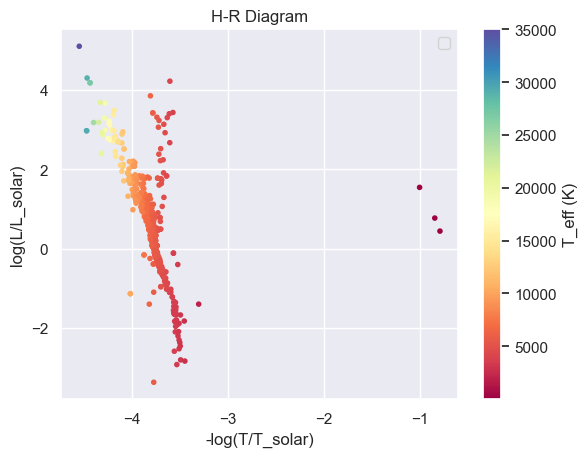

In [11]:
sns.set(color_codes=True)
sns.kdeplot(fill=True)

plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['T_eff'], cmap='Spectral')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.title('H-R Diagram')
plt.colorbar(label='T_eff (K)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


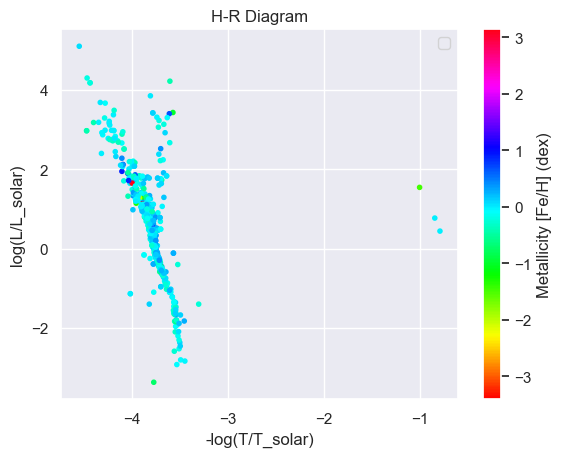

In [12]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#new_cm = cm.get_cmap('hsv',10)
plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['Metallicity'], cmap='hsv')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.title('H-R Diagram')
plt.colorbar(label='Metallicity [Fe/H] (dex)')
plt.legend()
plt.show()

c:\Users\luisg\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


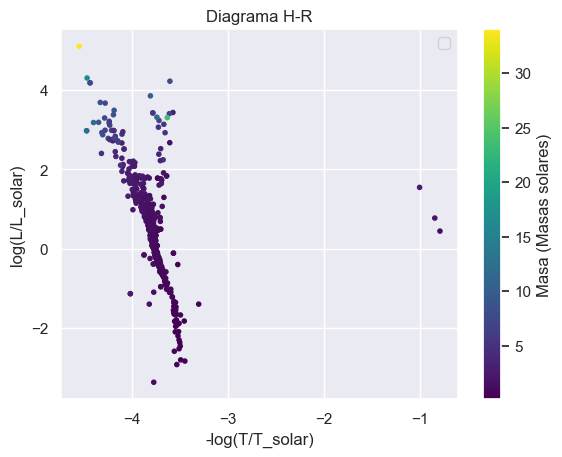

In [66]:
plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['Mass'], cmap='viridis')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
plt.title('Diagrama H-R')
plt.colorbar(label='Masa (Masas solares)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


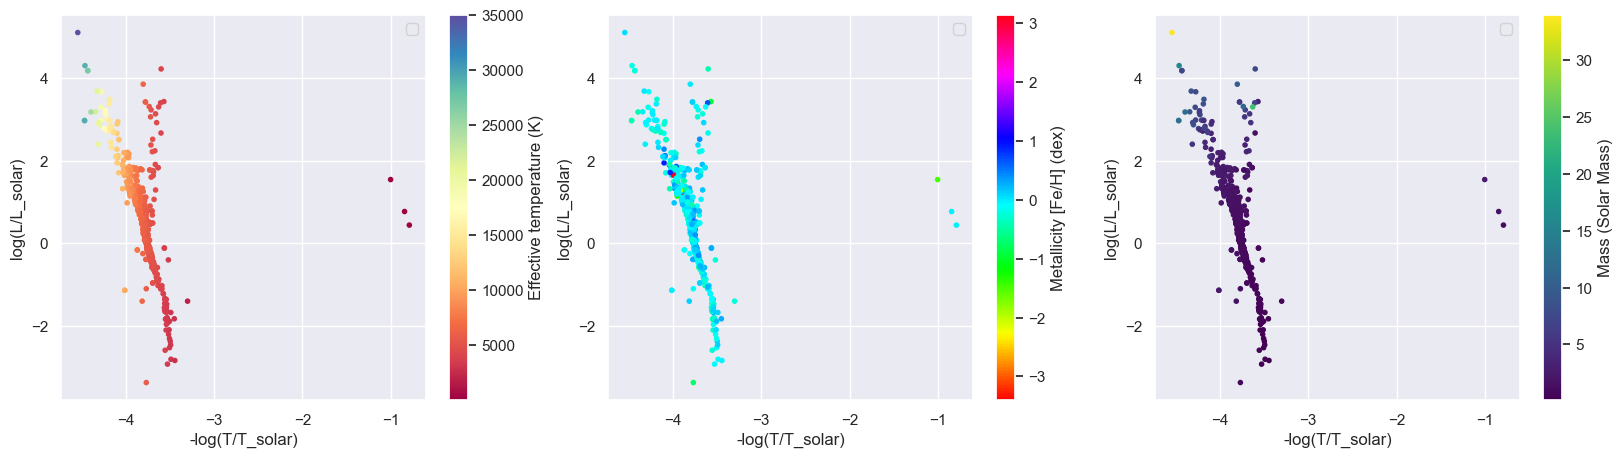

In [14]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['T_eff'], cmap='Spectral')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
#plt.title('H-R Diagram')
plt.colorbar(label='Effective temperature (K)')
plt.legend()

plt.subplot(132)
plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['Metallicity'], cmap='hsv')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
#plt.title('H-R Diagram')
plt.colorbar(label='Metallicity [Fe/H] (dex)')
plt.legend()

plt.subplot(133)
plt.scatter(-1*np.log10(df['T_eff']), np.log10(df['Luminosity']), marker='.', c=df['Mass'], cmap='viridis')
plt.xlabel('-log(T/T_solar)')
plt.ylabel('log(L/L_solar)')
#plt.title('H-R Diagram')
plt.colorbar(label='Mass (Solar Mass)')
plt.legend()

The general behaviour of the H-R diagram is satisfied in a simple inspection.

## Theoretical Model: StarStar program

StarStar is a program originally writen in FORTRAN and listed in the Appendix of the books "An Introduction to Modern Astrophysics" Bradley W. Carroll and Dale A. Ostlie, Addison-Wesley Publishing Company, copyright 1996, and "An Introduction to Modern Stellar Astrophysics," Dale A. Ostlie and Bradley W. Carroll, Addison-Wesley Publishing Company, copyright 1996. Based on the basics principles of stellar structure.

The program is capable of calculating the density, mass, luminosity, pressure and tempereture as function of the radius of the star.

A python version was translated by me, and I will be using it to find the central magnitudes of the structure of each star.

My translation of the program is presented here (the comments are in spanish because it was part of a class assignment):

In [15]:
#Definimos las constantes globales

# Constante de gravitación universal
G = 6.67259e-8 # m^3*kg^-1*s^-2

# Constante de Boltzman
k_B = 1.380658e-16 # J*K^-1

# Velocidad de la luz
c = 2.99792458e10 # m*s^-1

# Radio del Sol
Rsun = 6.9599e10 #m

# Masa del Sol
Msun = 1.989e33 #kg

# Luminosidad del Sol
Lsun = 3.826e33 #W

# Constante de Stefan-Boltzmann
sigma = 5.67051e-5 # W*m^-2*K^-4

# Constante de presión de radiación
a = 4*sigma/c

# Masa del H
m_H = 1.673534e-24 #kg

# Gamma adiabatica para un gas monoatómico
gamma = 5.0e0/3

# gamma/(gamma-1)
gamrat = gamma/(gamma - 1.0)

# Constante de la ley de gas adiabatico

#Temperatura en la superficie
T0 = 0.0

#Presión en la superficie
P0 = 0.0

# Constante de opacidad bound-free
#tog_bf = 0.01

# free-free opacity gaunt factor
g_ff = 0.1

# Número de pasos para los cuales las ecuaciones iniciales serán usadas
Nstart = 10

# Numero máximo de zonas permitidas en la estrella
Nstop = 999

kPad = 0.3

Igoof = -1


In [16]:
#Las siguientes 4 funciones calculan el gradiente de P, M, L y T

def dPdr(r, M_r, rho):
    #print (-1*G*rho*M_r/r**2)
    return -1*G*rho*M_r/r**2

def dMdr(r, rho):
    return 4.0*math.pi*rho*r**2

def dLdr(r, rho, epslon):
    return 4.0*math.pi*rho*epslon*r**2

def dTdr(r, M_r, L_r, T, rho, kappa, mu, irc):
    if (irc == 0.0):
        DTDR = -(3.0/(16.0*math.pi*a*c))*kappa*rho/T**3*L_r/r**2
    else:
        DTDR = -1.0/gamrat*G*M_r/r**2*mu*m_H/k_B 
    return DTDR


In [17]:
#Para calcular la densidad, opacidad, the guillotine-to-gaunt factor ratio, and the energy generation rate at the radius r.

def EOS(X, Z, XCNO, mu, P, T):
    #print(T)
    ierr = 0
    #Densidad usando la ley del gas ideal (sin presión de radiación)
    if (T < 0.0) or (P < 0.0):
        print('EOS, T = ',T)
        print('EOS, P = ',P)
        print('Parece que tu temperatura o tu presión han resultado en un valor negativo')
        print('Se abortara la simulación')
        print('El error aparece en la función EOS')
        ierr = 1
        return 0.0, ierr, 0.0, 0.0, 0.0
    Prad = a*T**4/3.00
    #print('Prad = ',Prad)
    Pgas = P - Prad
    #print('P = ', P)
    #print('Pgas = P - prad = ', Pgas)
    rho = (mu*m_H/k_B)*(Pgas/T)
    #print('rho = ', rho)
    #print('T = ', T)
    if (rho < 0.0):
        print('EOS, rho = ',rho)
        #print('mu = ', mu, 'Pgas = ', Pgas, 'T = ', T)
        print('No puede haber densidades negativas')
        print('El error surgió en la función EOS, al calcular rho')
        print('Las condiciones eran las siguientes:')
        print('T = ', T)
        print('P = ', P)
        print('Prad = ', Prad)
        print('Pgas = ', Pgas)
        print('Se detendra el calculo')
        ierr = 1
        return 0.0, ierr, 0.0 , 0.0 ,0.0
    

    #Opacidad
    tog_bf = 2.82*(rho*(1.0 + X))**0.2
    k_bf = (4.34e25)/tog_bf*Z*(1.0 + X)*rho/T**3.5
    k_ff = (3.68e22)*g_ff*(1.0 - Z)*(1.0 + X)*rho/T**3.5
    k_e = 0.2*(1.0 + X)
    kappa = k_bf + k_ff + k_e

    #Energía en la reacción pp y el ciclo CNO
    T6 = T*(1e-6)
    fx = 0.133*X*math.sqrt((3.0 + X)*rho)/T6**1.5
    fpp = 1.0 + fx*X
    psipp = 1.0 + (1.412e8)*(1.0/X - 1.0)*math.exp(-49.98*T6**(-1.0/3.0))
    Cpp = 1.0 + 0.0123*T6**(1.0/3.0) + 0.0109*T6**(2.0/3.0) + 0.000938*T6
    epspp = (2.38e6)*rho*X*X*fpp*psipp*Cpp*T6**(-2.0/3.0)*math.exp(-33.80*T6**(-1.0/3.0))
    CCNO = 1.0 + 0.0027*T6**(1.0/3.0) - 0.00778*T6**(2/3.0) - 0.000149*T6
    epsCNO = (8.67e27)*rho*X*XCNO*CCNO*T6**(-2.0/3.0)*math.exp(-152.28*T6**(-1.0/3.0))
    epslon = epspp + epsCNO

    return rho, ierr, tog_bf, kappa, epslon

In [18]:
#Para calcular los valores de M_r, L_r, P y T cerca de la superficie de la estrella

def STARTMDL(deltar, X, Z, mu, Rs, r_i, M_ri, L_ri, tog_bf, irc):
    r = r_i + deltar
    M_rip1 = M_ri
    L_rip1 = L_ri

    #Esta es la aproximación radiativa; no se considera la presión de radiación ni la opacidad por la dispersión electrónica
    if (irc == 0.0):
        T_ip1 = G*M_rip1*mu*m_H/(4.25*k_B)*(1.0/r - 1.0/Rs)
        A_bf = (4.34e25)*Z*(1.0 + X)/tog_bf
        A_ff = (3.68e22)*g_ff*(1.0 - Z)*(1.0 + X)
        Afac = A_bf + A_ff
        
        P_ip1 = math.sqrt((1.0/4.25)*(16.0/3.0*math.pi*a*c)*(G*M_rip1/L_rip1)*(k_B/(Afac*mu*m_H)))*T_ip1**4.25
        #P_ip1 = np.sqrt((1.0e0/4.25e0)*(16.0e0/3.0e0*np.pi*a*c)*(G*M_rip1/L_rip1)*(k_B/(Afac*mu*m_H)))*T_ip1**4.25e0
    else: #Aproximación convectiva
        T_ip1 = G*M_rip1*mu*m_H/k_B*(1.0/r - 1.0/Rs)/gamrat
        P_ip1 = kPad*T_ip1**gamrat
    
    return M_rip1, L_rip1, P_ip1, T_ip1, r

In [19]:
#FUNDEQ obtiene valores a usar en RK4
def FUNDEQ(r, f, irc, X, Z, XCNO, mu):
    dfdr = np.zeros(4)
    rho, ierr, tog_bf, kappa, epslon = EOS(X, Z, XCNO, mu, f[0], f[3])
    dfdr[0] = dPdr(r, f[1], rho)
    #print('df1[0] = ',df1[0])
    dfdr[1] = dMdr(r, rho)
    #print('df1[1] = ',df1[1])
    #print(r12, rho[im1])
    dfdr[2] = dLdr(r, rho, epslon)
    dfdr[3] = dTdr(r, f[1], f[2], f[3], rho,kappa, mu, irc)
    return dfdr, ierr

In [20]:
#Método Runge-Kutta de 4to orden para resolver ecuaciónes diferenciales
def RK4(f_im1, dfdr, r_im1, deltar, irc, X, Z, XCNO, rho, kappa, epslon, mu, im1,ierr):
    dr12 = deltar/2.0
    dr16 = deltar/6.0
    r12 = r_im1 + dr12
    r_i = r_im1 + deltar

    f_i = np.zeros(4,dtype=float)

    #Calculamos las derivadas intermedias de las ecuaciónes fundamentales de estructura estellar

    f_temp = np.zeros(4,dtype=float)
    df1 = np.zeros(4,dtype=float)
    df2 = np.zeros(4,dtype=float)
    df3 = np.zeros(4,dtype=float)

    #Calculamos la derivada para las ecuaciones de estructura estelar
    f_temp = f_im1 + dr12*dfdr
    df1, ierr = FUNDEQ(r12, f_temp, irc, X, Z, XCNO, mu)
    if (ierr != 0):
        print('Parece que ha ocurrido un error')
        print('El error aparece en la función RK4')
        print('Antes calcular los valores de df1, en EOS')
        return f_i, ierr

    
    f_temp = f_im1 + dr12*df1
    df2, ierr = FUNDEQ(r12, f_temp, irc, X, Z, XCNO, mu)
    if (ierr != 0):
        print('Parece que ha ocurrido un error')
        print('El error aparece en la función RK4')
        print('Antes calcular los valores de df2, en EOS')
        return f_i, ierr

    f_temp = f_im1 + deltar*df2
    df3, ierr = FUNDEQ(r_i, f_temp, irc, X, Z, XCNO, mu)
    if (ierr != 0):
        print('Parece que ha ocurrido un error')
        print('El error aparece en la función RK4')
        print('Antes calcular los valores de df3, en EOS')
        return f_i, ierr
    
    #Calculamos los valores de las variables para la siguiente capa
    f_i = f_im1 + dr16*(dfdr + 2.0*df1 + 2.0*df2 +df3)
    return f_i, 0

In [21]:
#Función principal del programa
def STAR(Msolar, Lsolar, Te, X, Z):
    #Definimos las características de la estrella
    Y = 1.0 - (X + Z)   # Fracción de He
    XCNO = Z/2.0        # Fracción de masa de CNO

    A = []

    istop = 0
    #Iniciamos los arreglos para las ecs de estructura estellar
    f_im1=np.zeros(4,dtype=float)
    dfdr=np.zeros(4,dtype=float)
    f_i=np.zeros(4,dtype=float)

    #Obtenemos estas magnitudes en S.I.
    Ms = Msolar*Msun
    Ls = Lsolar*Lsun
    Rs = math.sqrt(Ls/(4.0*math.pi*sigma))/Te**2
    Rsolar = Rs/Rsun

    #Step size
    deltar = -Rs/1000.0
    idrflg = 0

    #Calculamos el peso molecular medio mu al asumir ionización completa
    mu = 1.0/(2.0*X + 0.75*Y + 0.5*Z)


    #Definimos las variables de la estrella como np.array para almacenar ahí la información
    #Ademas inicializamos los valores de la superficie (indice = 0)
    # Masa radial
    Nstop = 999
    M_r = np.zeros(Nstop, dtype=float)
    M_r[0] = Ms
    # Radio
    r = np.zeros(Nstop, dtype=float)
    r[0] = Rs
    # Luminosidad
    L_r = np.zeros(Nstop, dtype=float)
    L_r[0] = Ls
    # Temperatura
    T = np.zeros(Nstop, dtype=float)
    T[0] = T0
    # Presión
    P = np.zeros(Nstop, dtype=float)
    P[0] = P0
    # Densidad
    rho = np.zeros(Nstop, dtype=float)

    kappa = np.zeros(Nstop, dtype=float)
    epslon = np.zeros(Nstop, dtype=float)
    tog_bf = np.zeros(Nstop, dtype=float)
    tog_bf[0] = 0.01

    Igoof = -1

    #Similarmente para rho, kappa y epslon
    ierr = 0.0
    if (P0 <= 0.0) or (T0 <= 0.0):    
        rho[0] = 0.0
        kappa[0] = 0.0
        epslon[0] = 0.0
        tog_bf[0] = 0.01
    else:
        rho[0], ierr, tog_bf[0], kappa[0], epslon[0] = EOS(X, Z, XCNO, mu, P[0], T[0])
        if (ierr != 0):
            print('Parece que ha ocurrido un error')
            print('El error sucede en la función principal')
            print('Al usar la función EOS, al inicializar las variables')
            istop=0
            sys.exit()
    
    #Para iniciar con la integración se aplican soluciones aproximadas en la superficie asumiendo transporte de radiación en la zona más externa
    #irc = 0 para radiación, irc = 1 para convección
    # Se asumen valores iniciales arbitrarios para kPad y dlPdlT

    kPad = 0.3
    irc = 0
    dlPdlT = np.zeros(Nstop,dtype=float)
    dlPdlT[0] = 4.25
    for i in range(0,Nstart):
        ip1 = i+1
        M_r[ip1], L_r[ip1], P[ip1], T[ip1], r[ip1] = STARTMDL(deltar, X, Z, mu, Rs, r[i], M_r[i], L_r[i], tog_bf[i], irc)
        rho[ip1], ierr, tog_bf[ip1], kappa[ip1], epslon[ip1] = EOS(X, Z, XCNO, mu, P[ip1], T[ip1])
        if (ierr != 0):
            A.append([r[i]/Rs, rho[i], M_r[i]/Ms, kappa[i], T[i], epslon[i], P[i], L_r[i]/Ls])
            print('ierr = ', ierr)
            print('Valores para la zona anterior')
            print('r = ', r[i])
            print('rho = ', rho[i])
            print('M_r = ', M_r[i])
            print('kappa = ', kappa[i])
            print('T = ', T[i])
            print('P = ', P[i])
            print('L = ', L_r[i])
            break
    
        #Determinación de si la convección estará presente en la zona siguiente.
        #Se obtiene calculando dlnP/dlnT entre i y i+1
        if (i > 0):
            dlPdlT[ip1] = math.log(P[ip1]/P[i])/math.log(T[ip1]/T[i])
        else:
            dlPdlT[ip1] = dlPdlT[i]

        if (dlPdlT[ip1] < gamrat):
            irc = 1
        else:
            irc = 0
            kPad = P[ip1]/T[ip1]**gamrat

        #Prueba para verificar si la suposición de masa constante sigue siendo valida
        deltaM = deltar*dMdr(r[ip1], rho[ip1])
        M_r[ip1] = M_r[i] + deltaM
        if (abs(deltaM) > 0.001*Ms):
            if (ip1 > 1):
                ip1 = ip1 - 1
                print('La variación de la masa es mayor a 0.001*Ms')
                print('Saliendo del ciclo de la aproximación...')
                break

    #En este loop las suposiciones de masa y luminosidad constantes no son validas
    #print('Nuevo Loop')
    Nsrtp = ip1 + 1
    
    #Para ver si es necesario parar la simulación
    if (ierr != 0):
        Nstop = Nsrtp - 1
        istop = Nstop


    for i in range(Nsrtp, Nstop):
        im1 = i - 1
        f_im1[0] = P[im1]
        f_im1[1] = M_r[im1]
        f_im1[2] = L_r[im1]
        f_im1[3] = T[im1]
        dfdr[0] = dPdr(r[im1], M_r[im1], rho[im1])
        dfdr[1] = dMdr(r[im1], rho[im1])
        dfdr[2] = dLdr(r[im1], rho[im1], epslon[im1])
        dfdr[3] = dTdr(r[im1], M_r[im1], L_r[im1], T[im1], rho[im1], kappa[im1], mu, irc)
        f_i, ierr = RK4(f_im1, dfdr, r[im1], deltar, irc, X, Z, XCNO, rho, kappa, epslon, mu, im1,ierr)
        if (ierr != 0):
            print('ierr = ', ierr)
            print('Deteniendo')
            print('El problema ocurrió en la función RK4')
            A.append([r[i]/Rs, rho[i], M_r[i]/Ms, kappa[i], T[i], epslon[i], P[i], L_r[i]/Ls])
            break
            

        #Actualizamos los parametros para la zona siguiente
        r[i] = r[im1] + deltar
        P[i] = f_i[0]
        M_r[i] = f_i[1]
        L_r[i] = f_i[2]
        T[i] = f_i[3]

        #Calculamos la densidad, opacidad y razon de la generación de energía en esta zona
        rho[i], ierr, tog_bf, kappa[i], epslon[i] = EOS(X, Z, XCNO, mu, P[i], T[i])
        if (ierr != 0):
            A.append([r[im1]/Rs, rho[im1], M_r[im1]/Ms, kappa[im1], T[im1], epslon[im1], P[im1], L_r[im1]/Ls])
            print('ierr = ', ierr)
            print('Valores para la zona anterior')
            print('r = ', r[i])
            print('rho = ', rho[i])
            print('M_r = ', M_r[i])
            print('kappa = ', kappa[i])
            print('T = ', T[i])
            print('P = ', P[i])
            print('L = ', L_r[i])
            break

        #Determinación de si la convección estará presente en la zona siguiente.
        #Se obtiene calculando dlnP/dlnT entre i y i+1
        #print('P[i] del error = ', P[i])
        #print(T[i],T[im1])

        dlPdlT[i] = math.log(P[i]/P[im1])/math.log(T[i]/T[im1])
        if (dlPdlT[i] < gamrat):
            irc = 1
        else:
            irc = 0

        
        #Vemos en caso de que el centro haya sido alcanzado ya
        #Igoof = -1
        if ((r[i] <= abs(deltar)) and ((L_r[i] >= 0.1*Ls) or M_r[i] >= 0.01*Ms)):
            Igoof = 6
        elif (L_r[i] <= 0):
            Igoof = 5
            rhocor = M_r[i]/(4.0/3.0*math.pi*r[i]**3)
            if (M_r[i] != 0):
                epscor = L_r[i]/M_r[i]
            else:
                epscor = 0.0
            Pcore = P[i] + 2.0/3.0*math.pi*G*rhocor**2*r[i]**2
            Tcore = Pcore*mu*m_H/(rhocor*k_B)
        elif (M_r[i] <= 0):
            Igoof = 4
            Rhocor = 0.0
            epscor = 0.0
            Pcore = 0.0
            Tcore = 0.0
        elif ((r[i] < 0.02*Rs) and (M_r[i] < 0.01*Ms) and (L_r[i] < 0.1*Ls)):
            rhocor = M_r[i]/(4.0/3.0*math.pi*r[i]**3)
            rhomax = 10.0*(rho[i]/rho[im1])*rho[i]
            epscor = L_r[i]/M_r[i]
            Pcore = P[i] = 2.0/3.0*math.pi*G*rhocor**2*r[i]**2
            Tcore = Pcore*mu*m_H/(rhocor*k_B)
            if ((rhocor < rho[i]) or (rhocor > rhomax)):
                Igoof = 1
            elif (epscor < epslon[i]):
                Igoof = 2
            elif (Tcore < T[i]):
                Igoof = 3
            else:
                Igoof = 0
        if (Igoof != -1):
            istop = i
            break
            
        
        #Debemos cambiar el step-size?
        if ((idrflg == 0) and (M_r[i] < 0.00*Ms)):
            deltar = -1*Rs/100.0
            idrflg = 1
        if ((idrflg == 1) and (deltar >= 0.5*r[i])):
            deltar = -1*Rs/5000.0
            idrflg = 2
        istop = i

    #Condiciones centrales
    rhocor = M_r[istop]/(4.0/3.0*math.pi*r[istop]**3)
    epscor = L_r[istop]/M_r[istop]
    Pcore = P[istop] = 2.0/3.0*math.pi*G*rhocor**2*r[istop]**2
    Tcore = Pcore*mu*m_H/(rhocor*k_B)

    if(Igoof != 0):
        if(Igoof == -1):
            print('Sorry to be the bearer of bad news, but...')
            print('       Your model has some problems')
            print('The number of allowed shells has been exceeded')

        if(Igoof == 1):
            print('It looks like you are getting close,')
            print('however, there are still a few minor errors')
            print('The core density seems a bit off,')
            print(' density should increase smoothly toward the center.')
            print(' The density of the last zone calculated was rho = ',rho[istop],' gm/cm**3')
            print (rhocor,rhomax)
        if(rhocor > 1e10):
            print('It looks like you will need a degenerate')
            print(' neutron gas and general relativity')
            print(' to solve this core.  Who do you think I am, Einstein?')

        if(Igoof == 2):
            print('It looks like you are getting close,')
            print('however, there are still a few minor errors')
            print('The core epsilon seems a bit off,')
            print(' epsilon should vary smoothly near the center.')
            print(' The value calculated for the last zone was eps =',epslon[istop],' ergs/g/s')

        if(Igoof == 3):
            print('It looks like you are getting close,')
            print('however, there are still a few minor errors')
            print(' Your extrapolated central temperature is too low')
            print(' a little more fine tuning ought to do it.')
            print(' The value calculated for the last zone was T = ',T[istop],' K')

        if(Igoof == 4):
            print('Sorry to be the bearer of bad news, but...')
            print('       Your model has some problems')
            print('You created a star with a hole in the center!')

        if(Igoof == 5):
            print('Sorry to be the bearer of bad news, but...')
            print('       Your model has some problems')
            print('This star has a negative central luminosity!')

        if(Igoof == 6):
            print('Sorry to be the bearer of bad news, but...')
            print('       Your model has some problems')
            print('You hit the center before the mass and/or ')
            print('luminosity were depleted!')
    else:
        print('CONGRATULATIONS, I THINK YOU FOUND IT!')
        print('However, be sure to look at your model carefully.')

    #Como es posible que la estrella este hueca o tengamos valores fuera de la realidad, en el siguiente ciclo los eliminaremos 
    RAD = np.zeros((istop), dtype=float)
    DENS = np.zeros((istop), dtype=float)
    MASA = np.zeros((istop), dtype=float)
    LUM = np.zeros((istop), dtype=float)
    PRESS = np.zeros((istop), dtype=float)
    TEM = np.zeros((istop), dtype=float)
    RCF = np.zeros((istop))

    for i in range(0,istop):
        #i = istop - (j+1)
        RAD[i] = r[i]
        DENS[i] = rho[i]
        MASA[i] = M_r[i]
        LUM[i] = L_r[i]
        PRESS[i] = P[i]
        TEM[i] = T[i]
        if (dlPdlT[i] < gamrat):
            RCF[i] = 1      #RCF es 1 si es convectiva y 0 si es radiativa

    #The program originally returns the whole star's structure but today the interest is in rhocor, Pcore, Tcore
    #print(r, rho, M_r, L_r, P, T)
    #estrella = {'Radio':RAD, 'Masa':MASA, 'Qm':1 - MASA/Ms, 'Luminosidad':LUM, 'Temperatura':TEM, 'Presión':PRESS, 'Densidad':DENS, 'Energy Transport':RCF}
    
    #df = pd.DataFrame.from_dict(estrella)

    return rhocor, Pcore, Tcore

In [22]:
#execution of the program
def starstar_main(Star_input):
    try:
        #Msolar, Te, Lsolar,X,Z
        Lsolar = Star_input[0]
        Msolar = Star_input[1]
        Fe_H = Star_input[2]
        Te = Star_input[3]

        #[Fe/H] is the difference of log(Z/X) with the sun
        # Z = (Z_sun)*10**[Fe/H]
        # X = X_sun

        Z_sun = 0.02
        X_sun = 0.7
        X = X_sun
        #print(type(Fe_H))
        Z = (Z_sun)*(10**Fe_H)
        
        rho_c, P_c, T_c = STAR(Msolar, Lsolar, Te, X, Z)
        return rho_c, P_c, T_c
    except:
        return np.nan, np.nan, np.nan

In [23]:
#calculations for each star
RHO = []
PRESSION = []
TEMPERATURE = []
lum = []
M = []
metal = []
Teff = []
for i in df.index:
    star = [df['Luminosity'][i], df['Mass'][i], df['Metallicity'][i], df['T_eff'][i]]
    dens_c, Press_c, Temp_c = starstar_main(star)
    RHO.append(dens_c)
    PRESSION.append(Press_c)
    TEMPERATURE.append(Temp_c)
    lum.append(star[0])
    M.append(star[1])
    metal.append(star[2])
    Teff.append(star[3])

df_STARS = pd.DataFrame({'Luminosity':lum, 'Mass':M, 'Metallicity':metal, 'T_eff':Teff, 'rho_c':RHO, 'P_c':PRESSION, 'T_c':TEMPERATURE})
df_STARS

Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to be the bearer of bad news, but...
       Your model has some problems
This star has a negative central luminosity!
Sorry to

,Luminosity,Mass,Metallicity,T_eff,rho_c,P_c,T_c
0,52.000,2.360,-0.020,9305.0,1380.916107,3.970073e+18,2.150821e+07
1,11.000,1.900,0.190,7912.0,557.012834,6.280112e+17,8.450295e+06
2,9.550,2.140,0.170,9671.0,19.501790,7.388806e+15,2.839069e+06
3,48.000,2.450,-0.110,9000.0,4780.370025,1.517909e+19,2.374202e+07
4,48.200,2.220,-0.170,8836.0,3205.100058,1.194619e+19,2.786040e+07
...,...,...,...,...,...,...,...
657,0.710,0.970,0.150,5568.0,141.234633,2.656277e+17,1.409025e+07
658,1.260,1.090,-0.020,6015.0,111.867175,1.113641e+17,7.447590e+06
659,1.190,1.010,-0.020,5700.0,171.782226,2.021878e+17,8.805417e+06
660,1.202,1.030,-0.260,6150.0,85.205437,4.130968e+16,3.622552e+06


In [24]:
#counting missing data
missing_data = df_STARS.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    662
Name: count, dtype: int64

Mass
Mass
False    662
Name: count, dtype: int64

Metallicity
Metallicity
False    662
Name: count, dtype: int64

T_eff
T_eff
False    662
Name: count, dtype: int64

rho_c
rho_c
False    659
True       3
Name: count, dtype: int64

P_c
P_c
False    659
True       3
Name: count, dtype: int64

T_c
T_c
False    659
True       3
Name: count, dtype: int64



In [25]:
df_STARS = df_STARS[df_STARS['rho_c'].notna()]

In [26]:
#counting missing data
missing_data = df_STARS.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    659
Name: count, dtype: int64

Mass
Mass
False    659
Name: count, dtype: int64

Metallicity
Metallicity
False    659
Name: count, dtype: int64

T_eff
T_eff
False    659
Name: count, dtype: int64

rho_c
rho_c
False    659
Name: count, dtype: int64

P_c
P_c
False    659
Name: count, dtype: int64

T_c
T_c
False    659
Name: count, dtype: int64



There is no longer missing data.

In [27]:
df_STARS.corr()

,Luminosity,Mass,Metallicity,T_eff,rho_c,P_c,T_c
Luminosity,1.000000,0.647251,-0.007495,0.409903,-0.009819,-0.006332,0.002131
Mass,0.647251,1.000000,-0.054983,0.743238,-0.003566,-0.006799,-0.018822
Metallicity,-0.007495,-0.054983,1.000000,-0.067446,-0.121672,-0.136573,-0.005640
T_eff,0.409903,0.743238,-0.067446,1.000000,0.026929,0.011004,0.042579
rho_c,-0.009819,-0.003566,-0.121672,0.026929,1.000000,0.512254,0.178451
P_c,-0.006332,-0.006799,-0.136573,0.011004,0.512254,1.000000,0.688387
T_c,0.002131,-0.018822,-0.005640,0.042579,0.178451,0.688387,1.000000


The correlation between these astronomical magnitudes is usually better understanded in a log10 scale

In [28]:
df_STARS[['Luminosity','Mass','T_eff','rho_c','P_c','T_c']]= df_STARS[['Luminosity','Mass','T_eff','rho_c','P_c','T_c']].apply(np.log10)
df_STARS

C:\Users\luisg\AppData\Local\Temp\ipykernel_43892\3406109249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_STARS[['Luminosity','Mass','T_eff','rho_c','P_c','T_c']]= df_STARS[['Luminosity','Mass','T_eff','rho_c','P_c','T_c']].apply(np.log10)


,Luminosity,Mass,Metallicity,T_eff,rho_c,P_c,T_c
0,1.716003,0.372912,-0.020,3.968716,3.140167,18.598798,7.332604
1,1.041393,0.278754,0.190,3.898286,2.745865,17.797967,6.926872
2,0.980003,0.330414,0.170,3.985471,1.290074,15.868574,6.453176
3,1.681241,0.389166,-0.110,3.954243,3.679462,19.181246,7.375518
4,1.683047,0.346353,-0.170,3.946256,3.505842,19.077229,7.444987
...,...,...,...,...,...,...,...
657,-0.148742,-0.013228,0.150,3.745699,2.149941,17.424273,7.148919
658,0.100371,0.037426,-0.020,3.779236,2.048703,17.046745,6.872016
659,0.075547,0.004321,-0.020,3.755875,2.234978,17.305755,6.944750
660,0.079904,0.012837,-0.260,3.788875,1.930467,16.616052,6.559015


In [49]:
#counting missing data
missing_data = df_STARS.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    659
Name: count, dtype: int64

Mass
Mass
False    659
Name: count, dtype: int64

Metallicity
Metallicity
False    659
Name: count, dtype: int64

T_eff
T_eff
False    659
Name: count, dtype: int64

rho_c
rho_c
False    618
True      41
Name: count, dtype: int64

P_c
P_c
False    659
Name: count, dtype: int64

T_c
T_c
False    618
True      41
Name: count, dtype: int64



In [50]:
df_STARS = df_STARS[df_STARS['rho_c'].notna()]

In [51]:
#counting missing data
missing_data = df_STARS.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Luminosity
Luminosity
False    618
Name: count, dtype: int64

Mass
Mass
False    618
Name: count, dtype: int64

Metallicity
Metallicity
False    618
Name: count, dtype: int64

T_eff
T_eff
False    618
Name: count, dtype: int64

rho_c
rho_c
False    618
Name: count, dtype: int64

P_c
P_c
False    618
Name: count, dtype: int64

T_c
T_c
False    618
Name: count, dtype: int64



In [52]:
df_STARS.corr()

,Luminosity,Mass,Metallicity,T_eff,rho_c,P_c,T_c
Luminosity,1.000000,0.920117,0.002204,0.427479,-0.221129,-0.203978,-0.122325
Mass,0.920117,1.000000,0.020957,0.450214,-0.210288,-0.184652,-0.072978
Metallicity,0.002204,0.020957,1.000000,0.104946,-0.008121,0.022833,0.138291
T_eff,0.427479,0.450214,0.104946,1.000000,0.595969,0.632083,0.712578
rho_c,-0.221129,-0.210288,-0.008121,0.595969,1.000000,0.995260,0.891835
P_c,-0.203978,-0.184652,0.022833,0.632083,0.995260,1.000000,0.931600
T_c,-0.122325,-0.072978,0.138291,0.712578,0.891835,0.931600,1.000000


            Luminosity     rho_c       P_c       T_c
Luminosity    1.000000 -0.221129 -0.203978 -0.122325
rho_c        -0.221129  1.000000  0.995260  0.891835
P_c          -0.203978  0.995260  1.000000  0.931600
T_c          -0.122325  0.891835  0.931600  1.000000


Text(0, 0.5, 'log(T_c)')

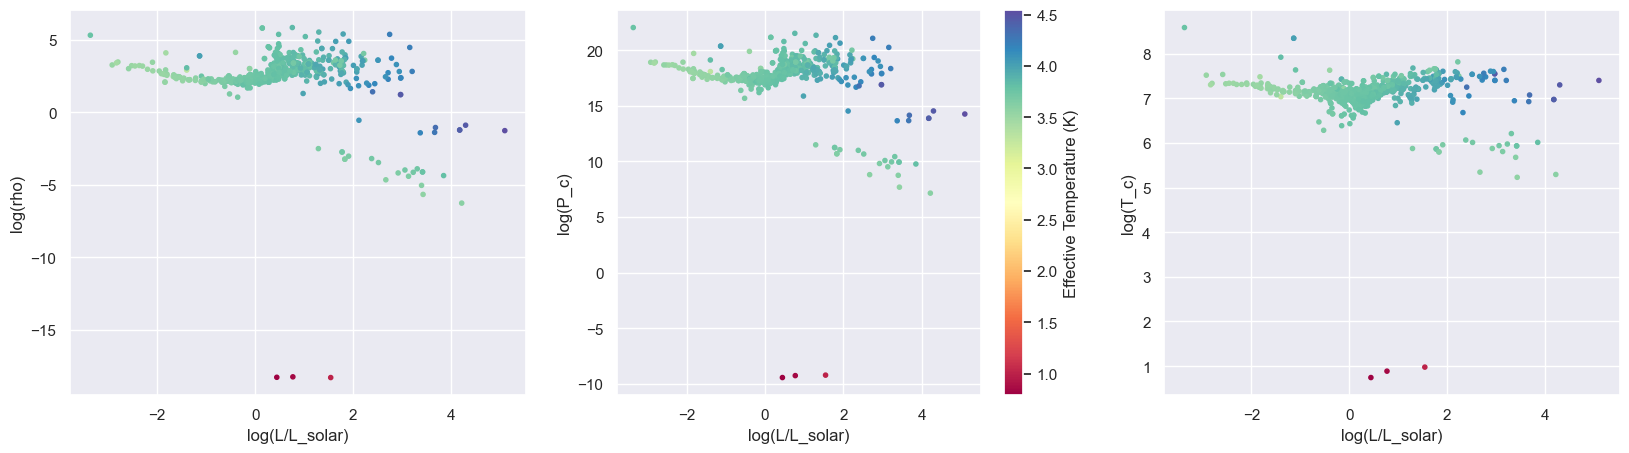

In [53]:
print(df_STARS[['Luminosity','rho_c','P_c','T_c']].corr())

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(df_STARS['Luminosity'],df_STARS['rho_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(L/L_solar)')
plt.ylabel('log(rho)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature')
#plt.xlim(3.0,5.0)
#plt.ylim(-10.,6.0)

plt.subplot(132)
plt.scatter(df_STARS['Luminosity'],df_STARS['P_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(L/L_solar)')
plt.ylabel('log(P_c)')
#plt.title('H-R Diagram')
plt.colorbar(label='Effective Temperature (K)')

plt.subplot(133)
plt.scatter(df_STARS['Luminosity'],df_STARS['T_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(L/L_solar)')
plt.ylabel('log(T_c)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature (K)')

           Mass     rho_c       P_c       T_c
Mass   1.000000 -0.210288 -0.184652 -0.072978
rho_c -0.210288  1.000000  0.995260  0.891835
P_c   -0.184652  0.995260  1.000000  0.931600
T_c   -0.072978  0.891835  0.931600  1.000000


Text(0, 0.5, 'log(T_c)')

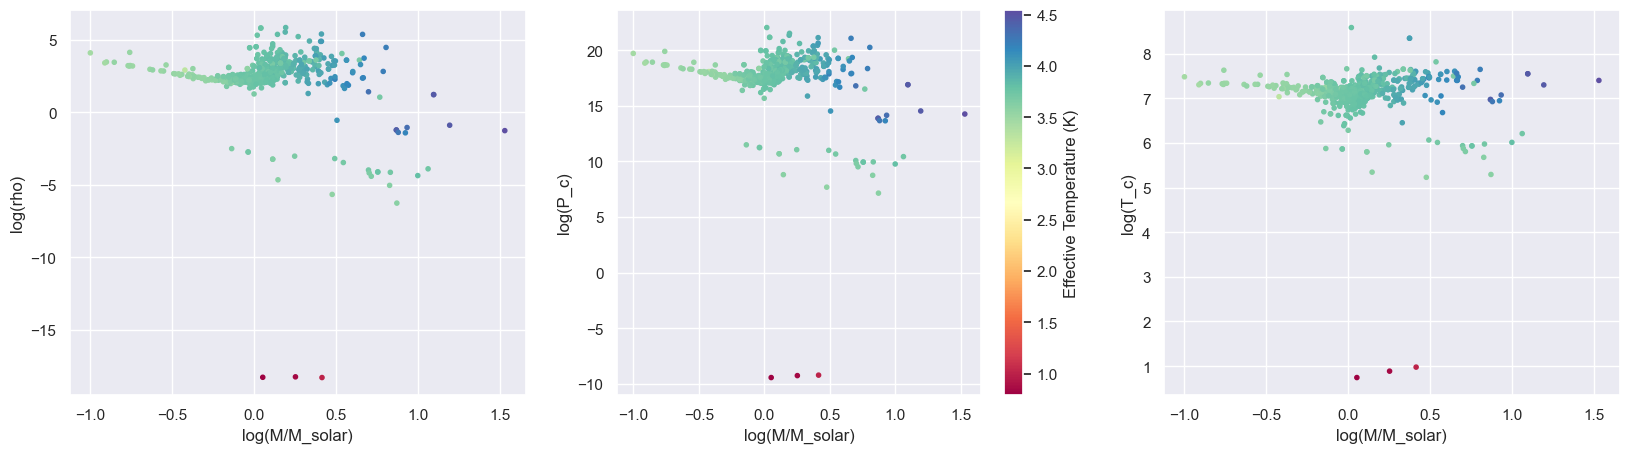

In [54]:
print(df_STARS[['Mass','rho_c','P_c','T_c']].corr())

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(df_STARS['Mass'],df_STARS['rho_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(M/M_solar)')
plt.ylabel('log(rho)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature')
#plt.xlim(3.0,5.0)
#plt.ylim(-10.,6.0)

plt.subplot(132)
plt.scatter(df_STARS['Mass'],df_STARS['P_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(M/M_solar)')
plt.ylabel('log(P_c)')
#plt.title('H-R Diagram')
plt.colorbar(label='Effective Temperature (K)')

plt.subplot(133)
plt.scatter(df_STARS['Mass'],df_STARS['T_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(M/M_solar)')
plt.ylabel('log(T_c)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature (K)')

          T_eff     rho_c       P_c       T_c
T_eff  1.000000  0.595969  0.632083  0.712578
rho_c  0.595969  1.000000  0.995260  0.891835
P_c    0.632083  0.995260  1.000000  0.931600
T_c    0.712578  0.891835  0.931600  1.000000


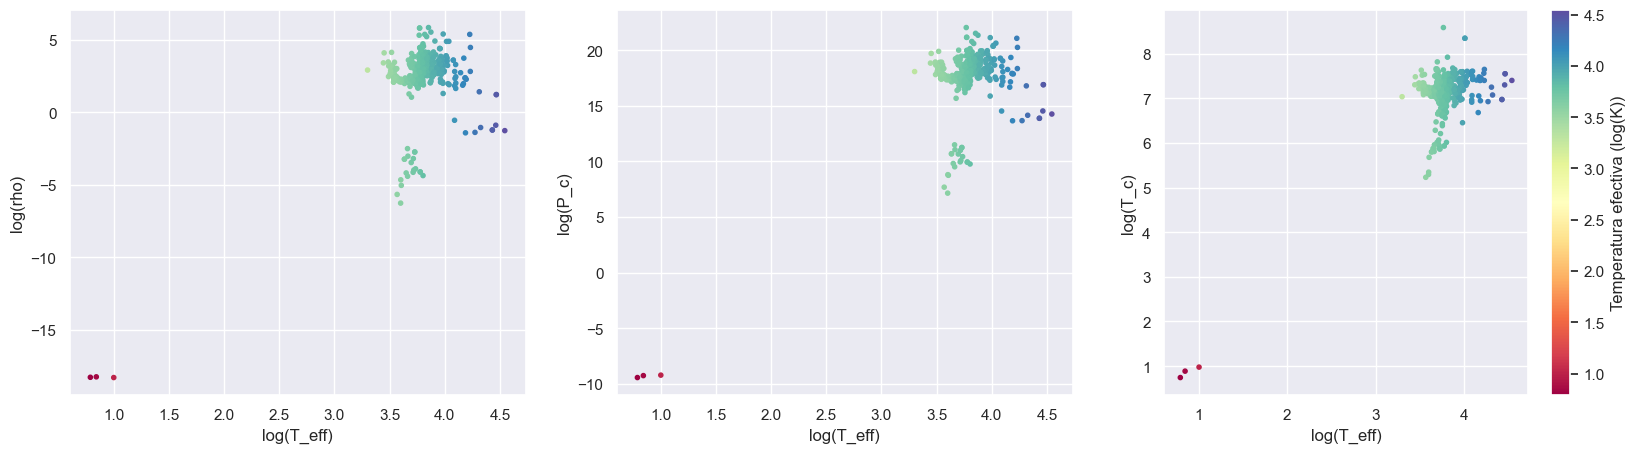

In [74]:
print(df_STARS[['T_eff','rho_c','P_c','T_c']].corr())

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(df_STARS['T_eff'],df_STARS['rho_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(T_eff)')
plt.ylabel('log(rho)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature')
#plt.xlim(3.0,5.0)
#plt.ylim(-10.,6.0)

plt.subplot(132)
plt.scatter(df_STARS['T_eff'],df_STARS['P_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(T_eff)')
plt.ylabel('log(P_c)')
#plt.title('Diagrama H-R')

plt.subplot(133)
plt.scatter(df_STARS['T_eff'],df_STARS['T_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('log(T_eff)')
plt.ylabel('log(T_c)')
#plt.title('H-R Diagram')
plt.colorbar(label='Temperatura efectiva (log(K))')

             Metallicity     rho_c       P_c       T_c
Metallicity     1.000000 -0.008121  0.022833  0.138291
rho_c          -0.008121  1.000000  0.995260  0.891835
P_c             0.022833  0.995260  1.000000  0.931600
T_c             0.138291  0.891835  0.931600  1.000000


Text(0, 0.5, 'log(T_c)')

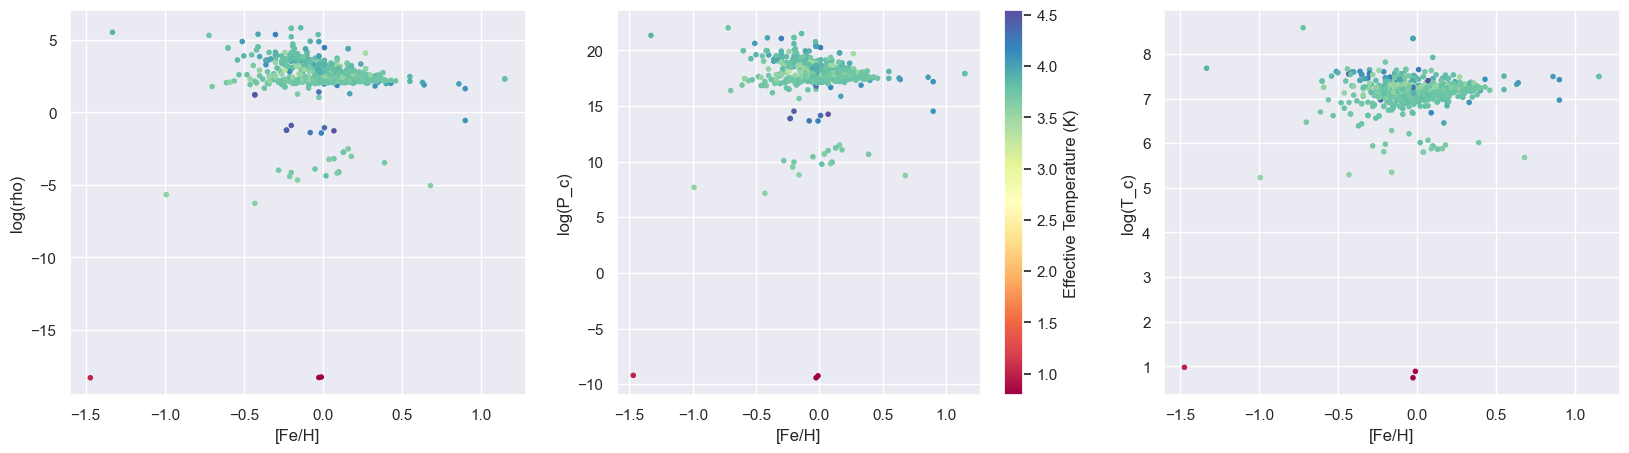

In [56]:
print(df_STARS[['Metallicity','rho_c','P_c','T_c']].corr())

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(df_STARS['Metallicity'],df_STARS['rho_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('[Fe/H]')
plt.ylabel('log(rho)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature')
#plt.xlim(3.0,5.0)
#plt.ylim(-10.,6.0)

plt.subplot(132)
plt.scatter(df_STARS['Metallicity'],df_STARS['P_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('[Fe/H]')
plt.ylabel('log(P_c)')
#plt.title('H-R Diagram')
plt.colorbar(label='Effective Temperature (K)')

plt.subplot(133)
plt.scatter(df_STARS['Metallicity'],df_STARS['T_c'],marker='.',c=df_STARS['T_eff'],cmap='Spectral')
plt.xlabel('[Fe/H]')
plt.ylabel('log(T_c)')
#plt.title('H-R Diagram')
#plt.colorbar(label='Effective Temperature (K)')

We can see that the Pearson correlation for the input values of luminosity, mass, metalicity with the central magnitudes does not give any significant value, therefore a linear model wouldn't be a good fit for this scenario. But for the effective temperature the correlation is a little bit bigger. Let's compare the Pearson correlation coefficient and the P-value in orther to see if the value of the correlation is statistically significant.

In [62]:
from scipy import stats

In [64]:
pearson_coef, p_value = stats.pearsonr(df_STARS['T_eff'],df_STARS['rho_c'])
print('For the T_eff with the central density')
print('The Pearson correlation coefficient is:', pearson_coef)
print('The p-value is', p_value)
print('')

pearson_coef, p_value = stats.pearsonr(df_STARS['T_eff'],df_STARS['P_c'])
print('For the T_eff with the central pressure')
print('The Pearson correlation coefficient is:', pearson_coef)
print('The p-value is', p_value)
print('')

pearson_coef, p_value = stats.pearsonr(df_STARS['T_eff'],df_STARS['T_c'])
print('For the T_eff with the central temperature')
print('The Pearson correlation coefficient is:', pearson_coef)
print('The p-value is', p_value)
print('')

For the T_eff with the central density
The Pearson correlation coefficient is: 0.5959687948412825
The p-value is 1.0909104436616181e-60

For the T_eff with the central pressure
The Pearson correlation coefficient is: 0.6320827288799045
The p-value is 3.0254621618566975e-70

For the T_eff with the central temperature
The Pearson correlation coefficient is: 0.7125780685388656
The p-value is 6.948789063005404e-97



We can say that the effective temperature and the central temperature have a moderately strong linear correlation (~0.71) and that it's statistically significant due to the low p-value (6.95e-97)

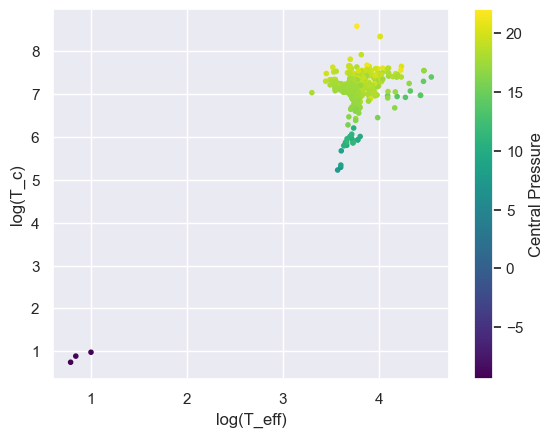

In [65]:
plt.scatter(df_STARS['T_eff'],df_STARS['T_c'],marker='.',c=df_STARS['P_c'],cmap='viridis')
plt.xlabel('log(T_eff)')
plt.ylabel('log(T_c)')
plt.colorbar(label='Central Pressure')

While the correlation (Pearson Correlation) between central magnitudes is in many instances good, however this are caused by the equations directly written in the theoretical model in the starstar program. This correlation and the behaviur it shows can be seen more deeply as follows:

          rho_c       T_c
rho_c  1.000000  0.891835
T_c    0.891835  1.000000


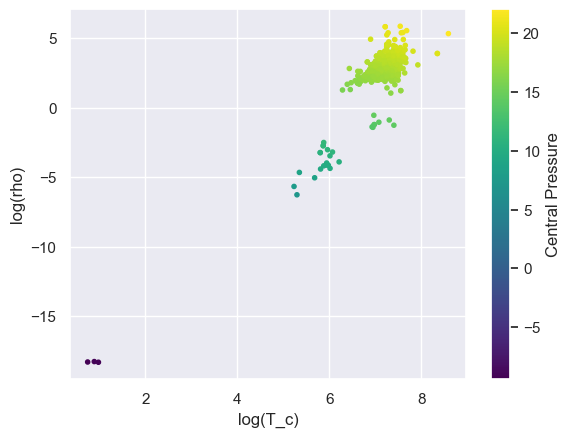

In [57]:
print(df_STARS[['rho_c','T_c']].corr())
plt.scatter(df_STARS['T_c'],df_STARS['rho_c'],marker='.',c=df_STARS['P_c'],cmap='viridis')
plt.xlabel('log(T_c)')
plt.ylabel('log(rho)')
plt.colorbar(label='Central Pressure')

         rho_c      P_c
rho_c  1.00000  0.99526
P_c    0.99526  1.00000


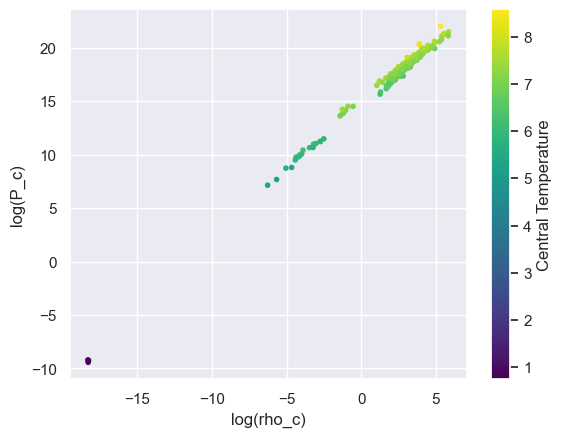

In [59]:
print(df_STARS[['rho_c','P_c']].corr())
plt.scatter(df_STARS['rho_c'],df_STARS['P_c'],marker='.',c=df_STARS['T_c'],cmap='viridis')
plt.xlabel('log(rho_c)')
plt.ylabel('log(P_c)')
plt.colorbar(label='Central Temperature')

        P_c     T_c
P_c  1.0000  0.9316
T_c  0.9316  1.0000


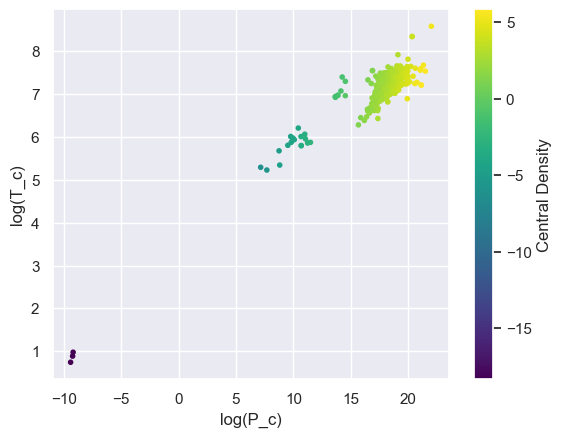

In [60]:
print(df_STARS[['P_c','T_c']].corr())
plt.scatter(df_STARS['P_c'],df_STARS['T_c'],marker='.',c=df_STARS['rho_c'],cmap='viridis')
plt.xlabel('log(P_c)')
plt.ylabel('log(T_c)')
plt.colorbar(label='Central Density')

In [61]:
df_STARS.describe()

,Luminosity,Mass,Metallicity,T_eff,rho_c,P_c,T_c
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.396531,0.079010,-0.004377,3.768814,2.343141,17.577294,7.108432
std,1.179385,0.283419,0.249723,0.250024,2.046325,2.547754,0.548597
min,-3.366532,-1.000000,-1.470000,0.789933,-18.306189,-9.418981,0.743040
25%,-0.236572,-0.050610,-0.140000,3.718605,2.162942,17.364938,7.048163
50%,0.267406,0.041393,-0.020000,3.765818,2.413522,17.690762,7.170319
75%,0.994529,0.175365,0.140000,3.819363,3.064592,18.436837,7.284804
max,5.100371,1.531479,1.150000,4.544068,5.840136,22.024547,8.586089


## Conclusion:

With firts analysis it isn't a viable option to develope linear models for the central magnitudes of density, pressure and temperature of a star from its total mass, luminosity, effective temperature and metallicity.
However it was possible to confirm that magnitudes like mass, luminosity and temperature are highly correlated as its pearson coefficient was near an absolute value of 1.